#**1. Əsas Anlayışlar və Tərif**


## **1.1 Decision Tree-nin (Qərar Ağacı) Tərifi**

**Decision Tree** (Qərar Ağacı) — verilənləri müəyyən şərtlərə görə budaqlara ayıraraq proqnoz və ya təsnifat aparan, ağac quruluşuna malik maşın öyrənməsi alqoritmidir.

* **Kök (root)** → İlk bölünmə nöqtəsi (başlanğıc)
* **Budaqlar (branches)** → Şərtlərə görə məlumatın bölünməsi
* **Yarpaq düyünləri (leaves)** → Son qərar və ya proqnoz nəticəsi

📌 Qısaca: **"Bir sıra bəli/xeyr sualları verərək nəticəyə çatmaq"** prinsipi ilə işləyir.
Məsələn:

> “Hava günəşlidirmi?” → Bəli → “Rütubət azdırmı?” → Xeyr → “O zaman çölə çıxma.”

## **1.2 İstifadə Məqsədləri**

Qərar ağacları həm **Təsnifat (Classification)**, həm də **Reqressiya (Regression)** problemlərində istifadə olunur.

* **Təsnifat** → Bir müşahidəni müəyyən kateqoriyalardan birinə aid edir.
  Nümunə: E-poçt spamdır, yoxsa deyil? 📧

* **Reqressiya** →  Dəyər proqnozlaşdırır.
  Nümunə: Bir evin qiymətini təxmin etmək 🏠💰

## **1.3 Üstünlüklər və Çatışmazlıqlar**

**Üstünlüklər** ✅

* İnsan tərəfindən asan başa düşülür (white-box model)
* Məlumat miqyaslandırması tələb etmir
* Həm ədədi, həm də kateqorik verilənlərlə işləyə bilir
* Qərar qaydaları açıq şəkildə görünür

**Çatışmazlıqlar** ❌

* Asanlıqla **overfitting** edə bilər (çox dərin ağaclarda)
* Kiçik məlumat dəyişikliklərində fərqli ağac strukturları yarana bilər (yüksək variasiya)
* Çox mürəkkəb əlaqələri modelləşdirməkdə çətinlik çəkə bilər (bu halda ensemble metodları daha uyğundur)

## **1.4 Qərar Ağaclarının Ümumi Quruluşu**

Qərar ağacı aşağıdakı hissələrdən ibarətdir:

1. **Root Node (Kök Düyün)**

   * Məlumatın hamısını təmsil edir.
   * İlk bölünmənin aparıldığı yerdir.

2. **Internal Nodes (Daxili Düyünlər)**

   * Məlumat müəyyən xüsusiyyətə görə bölünür.
   * Məs: “Yaş < 30?”

3. **Leaf Nodes (Yarpaq Düyünləri)**

   * Son proqnozun verildiyi düyünlər.
   * Təsnifatda: sinif etiketi
   * Reqressiyada: proqnoz dəyəri

4. **Edges (Bağlantılar)**

   * Şərtlərə görə düyünlər arasında keçidi təmin edir.

```
      [Yaş < 30?]
       /     \
     Bəli    Xeyr
    /           \
[Gəlir < 50K?]  [Alış = Xeyr]
 /      \
Bəli     Xeyr
[Alış = Bəli]  [Alış = Xeyr]
```



## **1.5 Terminologiya**

* **Feature (Xüsusiyyət)** → Məlumat dəstindəki giriş dəyişənləri (məs. yaş, gəlir)
* **Threshold (Hədd)** → Xüsusiyyətin bölünmə nöqtəsi (məs. yaş < 30)
* **Impurity (Qarışıqlıq)** → Düyündəki nümunələrin qarışıq dərəcəsi
* **Split (Bölünmə)** → Bir düyünün iki və ya daha çox alt düyünə ayrılması
* **Depth (Dərinlik)** → Kökdən yarpağa qədər ən uzun yolun uzunluğu
* **Leaf Node (Yarpaq Düyünü)** → Proqnozun verildiyi nöqtə



💡 **Nümunə Ssenari**
Bir e-ticarət şirkəti müştərinin **kampaniya emailindən sonra alış edib-etməyəcəyini** proqnozlaşdırmaq istəyir.

* **Xüsusiyyətlər**: Yaş, gəlir, saytda keçirdiyi vaxt, əvvəlki alış sayı
* **Kök Bölünmə**: "Əvvəlki alış sayı > 3?"
* Əgər bəli → “Gəlir > 50K?”
* Əgər xeyr → "Saytda keçirdiyi vaxt > 5 dəqiqə?"
  Bu şəkildə davam edərək **müştəri alacaqmı, almayacaqmı** qərarı verilir.


#**2. Qərar Ağaclarının Məntiqi**

## **2.1 Qərarvermə prosesinin iyerarxik quruluşu**

Qərar ağacı **“böyükdən kiçiyə getmək”** prinsipi ilə işləyir.

* Əvvəlcə bütün məlumat **root node**-da olur.
* Sonra seçilmiş bir xüsusiyyətə görə (feature) məlumat **iki və ya daha çox hissəyə bölünür**.
* Hər bölünən hissə yeni düyün olur və öz növbəsində yenidən bölünə bilər.
* Bu proses **bütün düyünlər “yetərincə təmiz” olana** və ya **dayandırma şərti** ödənənə qədər davam edir.

📌 *İyerarxiya nümunəsi*

1. Əvvəl: “Yaş < 30?”
2. Sonra: “Gəlir > 50K?”
3. Daha sonra: “Müştəri əvvəllər alış edibmi?”

Bu ardıcıllıq, ən ümumi şərtlərdən başlayaraq daha detallı şərtlərə enir.

## **2.2 Budaqlanma (Branching) və Alt Çoxluqlara Bölünmə**

Hər daxili düyün (internal node) **budaqlanma** nöqtəsidir.

* **Budaqlanma** zamanı verilənlər, seçilmiş xüsusiyyətin müəyyən həddinə (threshold) görə **iki** (və ya bəzi metodlarda daha çox) alt qrupa bölünür.
* Məsələn: “Gəlir > 50K?” → Bəli qolu və Xeyr qolu.

Bu, insanın gündəlik həyatda qərar verməsinə bənzəyir: *Əgər bəli isə bu yolu seç, yox əgər xeyr isə o yolu seç.*

## **2.3 Bölünmə Şərti (Splitting Criterion)**

Qərar ağacı **hansı xüsusiyyətə görə** bölünmə edəcəyini və **hansı həddən** kəsəcəyini seçərkən bir kriteriyaya əsaslanır.

* Məqsəd: düyünləri **mümkün qədər “təmiz”** etmək.
* **Təmizlik (purity)** → Eyni sinifdən müşahidələrin bir yerdə toplanması.

Məsələn, təsnifat (classification) üçün:

* **Gini Impurity**
* **Entropy və Information Gain**

Reqressiya üçün:

* **MSE (Mean Squared Error) azalması**
* **Variance Reduction**

Formul nümunəsi (Information Gain): $
IG = H(parent) - \sum_{i} \frac{n_i}{n} H(child_i)
$

Burada:

* \$H\$ → entropiya
* \$n\$ → müşahidələrin sayı

## **2.4 Qərar yolları (Decision Paths)**

Qərar ağacında **root node-dan leaf node-a gedən yol** bir **qərar qaydası**dır.

* Məsələn:

  1. Yaş < 30
  2. Gəlir > 50K
  3. Alış = Bəli

Bu yol **əgər-onda** (if-then) məntiqi ilə işləyir:

```
Əgər (Yaş < 30) və (Gəlir > 50K) onda Alış = Bəli
```

## **2.5 Təsnifat və Reqressiya Ağacları Arasındakı Fərqlər**

* **Təsnifat ağacı**: Leaf node-lar **sinif etiketi** qaytarır (məs. “Bəli”, “Xeyr”).
* **Reqressiya ağacı**: Leaf node-lar **ədədi qiymət** qaytarır (məs. 35000 manat).
* Fərq: Bölünmə kriteriyaları və nəticənin tipi fərqlidir.

#**3. Bölünmə Şərtləri (Splitting Criteria)**

## **3.1 Gini Impurity (Gini Qarışıqlığı)**

Gini impurity təsnifat problemlərində istifadə olunur və düyündəki qarışıqlığın ölçüsüdür.

* Formulu:

$$
Gini = 1 - \sum_{i=1}^{C} p_i^2
$$

Burada:

* \$C\$ → siniflərin sayı

* \$p\_i\$ → i-ci sinifin nisbəti düyündə

* Məqsəd: Gini aşağı olduqda düyün daha təmizdir. ✅

**Nümunə:**

* Düyündə 10 müşahidə, 7 Bəli, 3 Xeyr

$$
Gini = 1 - ((7/10)^2 + (3/10)^2) = 0.42
$$

Daha təmiz bir bölünmə Gini-ni 0.0-a yaxınlaşdırır.

## **3.2 Entropy və Information Gain**

**Entropy** düyündəki qarışıqlığın ölçüsüdür:

$$
H = -\sum_{i=1}^{C} p_i \log_2(p_i)
$$

**Information Gain (IG)** bölünmə nəticəsində əldə olunan məlumat artımını göstərir:

$$
IG = H(parent) - \sum_{i} \frac{n_i}{n} H(child_i)
$$

* Məqsəd: Böyük IG → daha yaxşı bölünmə.

## **3.3 Mean Squared Error (MSE) və Reqressiya**

Reqressiya ağaclarında bölünmə kriteriyası olaraq **MSE azalması** istifadə olunur.

* Formulu:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2
$$

* Bölünmə zamanı məqsəd: child node MSE-si parent node MSE-sindən aşağı olsun.

**Nümunə:**

* Parent node : y = \[3, 5, 7] → MSE = 2.67
* Bölünmə → sol: \[3, 5] (MSE=1), sağ: \[7] (MSE=0)
* Weighted MSE azalır → bölünmə yaxşıdır.

## **3.4 Impurity Reduction / Variance Reduction**

* Təsnifat üçün → **impurity reduction**
* Reqressiya üçün → **variance reduction**
* Məqsəd: Hər bölünmə düyünü daha homogen (təhlükəsiz və təmiz) edir.

#**4. Modelin mürəkkəbliyini tənzimləmə**

Bir decision tree çox dərin, çox budaqlı və çox detallı qurularsa, train datasını “əzbərləyər” (overfitting).  
Çox sadə qurularsa, əksinə, nümunələrin arasındakı əlaqəni kifayət qədər öyrənməz (underfitting).  
Buna görə, ağacın **həm çox mürəkkəb olmaması, həm də çox sadə qalmaması** üçün müxtəlif parametrlərdən istifadə edirik.

## 4.1. Maksimum dərinlik (max_depth)

**Təsviri:**  
- `max_depth` ağacın kökdən (root) yarpaq düyünə qədər maksimum neçə səviyyə dərinləşəcəyini müəyyən edir.  
- Dərinlik çox böyük olarsa, model çox incə nümunə fərqlərini də öyrənərək overfitting edər.  
- Çox kiçik olarsa, model sadələşərək nümunələri kifayət qədər ayıra bilməz.

**Misal:**  
Əgər `max_depth = 3` seçsək, kökdən aşağıya doğru **ən çox 3 addım** gedə bilərik.

**Praktiki qayda:**  
- Kiçik datasetlərdə çox böyük `max_depth` risklidir.  
- Bəzən “cross-validation” ilə optimal dərinliyi seçmək lazımdır.

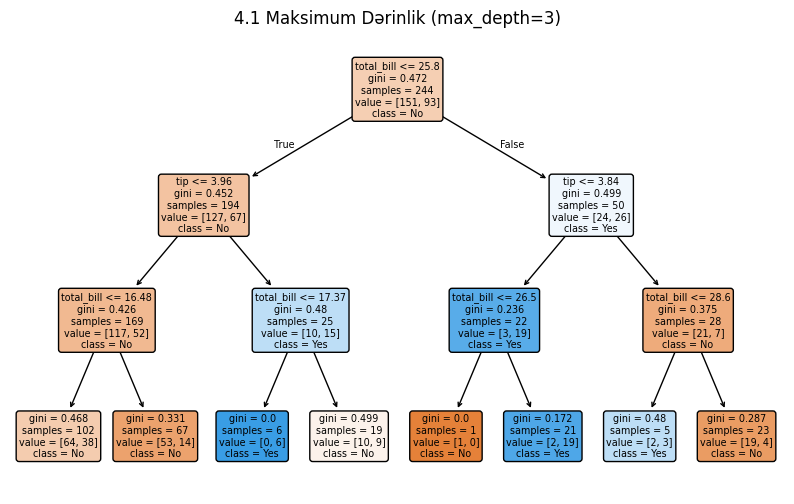

##4.2. Minimum nümunə sayı (min_samples_split, min_samples_leaf)

### **a) min_samples_split**
- Bir düyünü **bölmək** üçün lazım olan minimum nümunə sayı.
- Əgər bir düyündəki nümunə sayı bu həddən azdırsa, bölünmə aparılmır.
- Bu, ağacın çox xırda qruplara bölünməsinin qarşısını alır.

### **b) min_samples_leaf**
- Bir **yarpaq düyündə** qalması lazım olan minimum nümunə sayı.
- Bu, nəticədə yaranan yarpaqların çox kiçik (məsələn, tək nümunəlik) olmasını əngəlləyir.

**Misal:**  
- `min_samples_split = 4` → Bir düyündə 4-dən az nümunə varsa, daha çox bölünməz.  
- `min_samples_leaf = 2` → Yarpaqda ən az 2 nümunə qalmalıdır.

## 4.3. Maksimum xüsusiyyət sayı (max_features)

**Təsviri:**  
- Hər bölünmədə istifadə olunacaq xüsusiyyət (feature) sayını məhdudlaşdırır.  
- Məsələn, 10 xüsusiyyətli datasetdə `max_features = 4` seçsək, hər düyündə yalnız 4 təsadüfi xüsusiyyət yoxlanır.

**Niyə vacibdir?**  
- Overfitting riskini azaldır, çünki model hər dəfə bütün xüsusiyyətləri yoxlamır.  
- Eyni zamanda hesablama xərci azalır.

**Random Forest** modellərində bu parametr çox kritikdir.

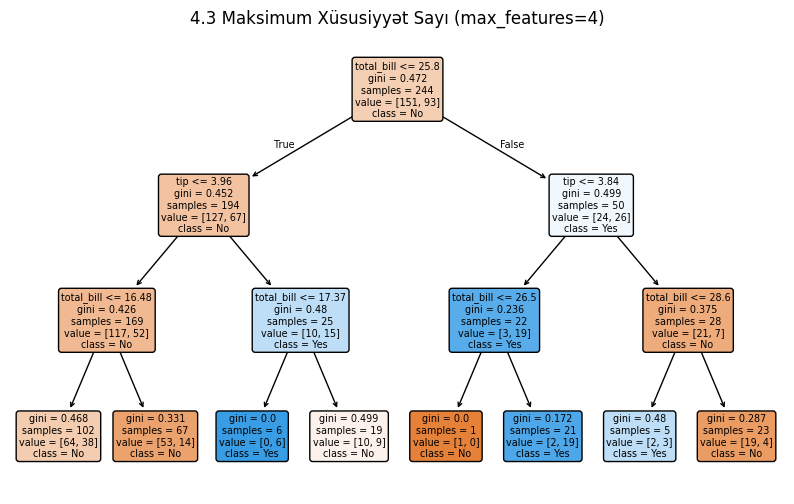

## 4.4. Maksimum yarpaq sayı (max_leaf_nodes)

**Təsviri:**  
- Ağacın nə qədər yarpaq düyünü ola biləcəyini məhdudlaşdırır.
- Bu, nəticədə daha kompakt, daha sadə bir model yaradır.

**Misal:**  
- `max_leaf_nodes = 5` → ağac ən çox 5 nəticə qrupuna (leaf) sahib ola bilər.

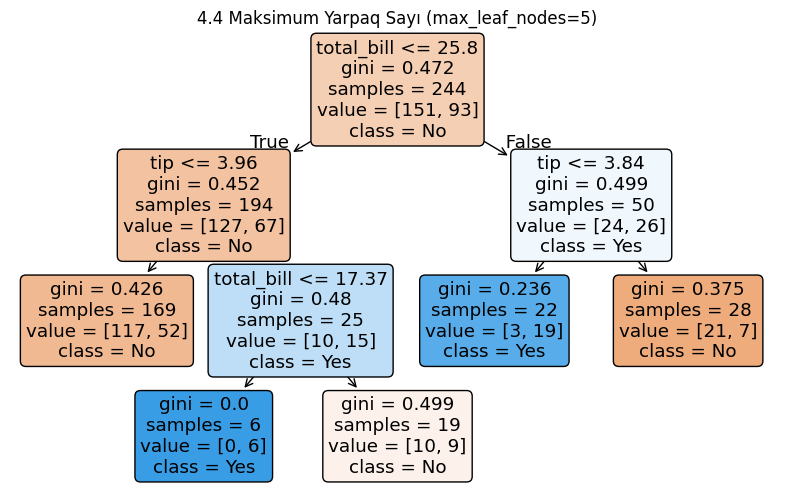

## 4.5. Minimum impurity decrease

**Təsviri:**  
- Bölünmə aparmaq üçün impurity-də (məsələn, Gini, Entropy və ya MSE) **minimum azalma miqdarı**.
- Əgər bölünmə impurity-ni bu həddən az azaldırsa, bölünmə etmirik.

**Formula:**  
$$
\Delta I = I_{\text{parent}} - \left( \frac{n_L}{n}I_L + \frac{n_R}{n}I_R \right)
$$  
Burada:  
- $ I_{\text{parent}} $ – valideyn düyünün impurity-si  
- $ I_L, I_R $ – sol və sağ düyünlərin impurity-si  
- $ n_L, n_R, n $ – sol, sağ və ümumi nümunə sayı

Əgər $ \Delta I < \text{minimum\_impurity\_decrease} $ → bölünmə aparılmır.

## 4.6. Ön budama (pre-pruning)

**Təsviri:**  
- Ağac hələ qurularkən, müəyyən şərtlər ödənmirsə, budaqların yaranmasını **əvvəldən dayandırmaq**.
- Burada yuxarıdakı bütün parametrlər (`max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`, `max_leaf_nodes`, `minimum_impurity_decrease`) **ön budama** üsullarıdır.

**Üstünlük:**  
- Daha sürətli təlim.  
- Daha sadə model.

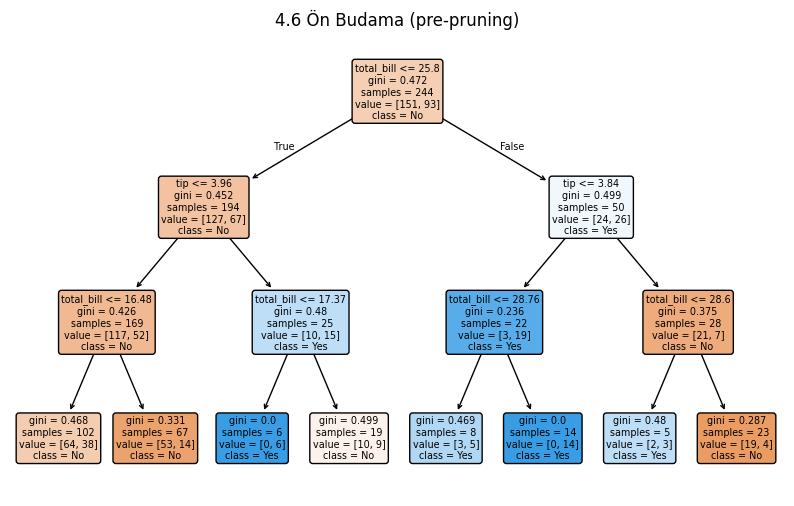

## 4.7. Sonradan budama (post-pruning, cost complexity pruning)

**Təsviri:**  
- Ağac əvvəlcə tam şəkildə qurulur (çox mürəkkəb ola bilər).  
- Daha sonra bəzi budaqlar kəsilərək sadələşdirilir.

**Ən məşhur üsul – Cost Complexity Pruning:**  
- Hər yarpaq sayı artdıqca **modelin cəza dəyəri** artır.
- Cəza dəyəri:
$$
R_\alpha(T) = R(T) + \alpha \cdot |T_{\text{leaves}}|
$$  
Burada:  
- $ R(T) $ – səhv dərəcəsi  
- $ \alpha $ – mürəkkəblik cəza əmsalı  
- $ |T_{\text{leaves}}| $ – yarpaq sayı

- Daha böyük $ \alpha $ → daha sadə ağac.

**Misal proses:**  
1. Ağac tam qurulur.  
2. Fərqli $ \alpha $ dəyərləri üçün budaqlar silinir.  
3. Cross-validation ilə ən yaxşı $ \alpha $ seçilir.


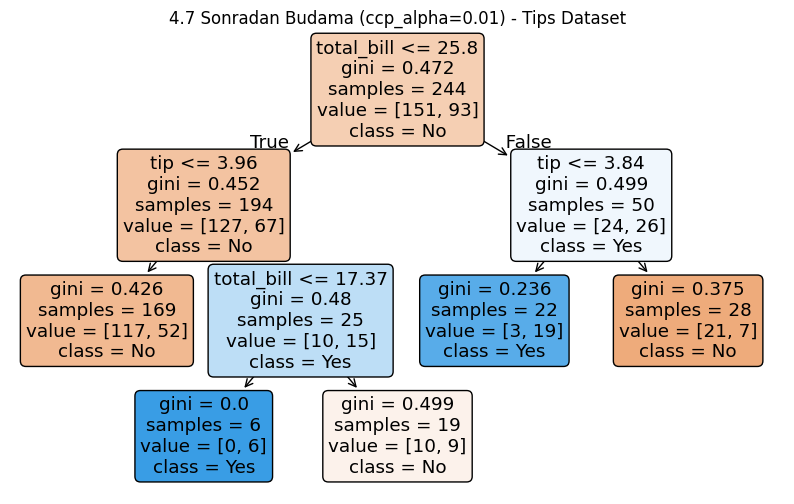

#**5. Xüsusiyyət Əhəmiyyət Dərəcələri (Feature Importance)**

Decision Tree modellərinin üstünlüklərindən biri də hər bir xüsusiyyətin (feature) proqnoza təsir dərəcəsini hesablaya bilməsidir.  
Bu göstəriciyə **xüsusiyyət əhəmiyyəti** deyilir və modelin hansı dəyişənlərdən daha çox istifadə etdiyini görməyə imkan verir.

## 5.1. Gini importance (Mean Decrease in Impurity)

**Təsviri:**  
- “Mean Decrease in Impurity” (MDI) olaraq da tanınır.  
- Hər bir xüsusiyyətin **impurity-ni nə qədər azaltdığını** ölçür.  
- Ağacın hər bölünməsində seçilən xüsusiyyətin impurity-də yaratdığı azalma hesablanır və bütün ağac boyunca ortalaması götürülür.

**Formula:**  
$$
\text{Gini Importance}(f) = \sum_{\text{splitlərdə } f} \frac{n_{\text{node}}}{n_{\text{total}}} \cdot \Delta I
$$  
Burada:  
- $ n_{\text{node}} $ – bölünən düyündəki nümunə sayı  
- $ n_{\text{total}} $ – ümumi nümunə sayı  
- $ \Delta I $ – impurity-də azalma miqdarı (məsələn, Gini və ya Entropy azalma dəyəri)

**Xüsusiyyət:**  
- Hesablama sürətlidir, amma bəzi hallarda **kategorik dəyişənləri və çox səviyyəli xüsusiyyətləri üstün göstərə bilər**.

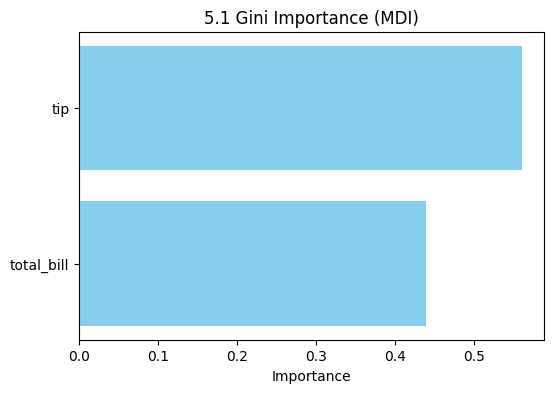

##5.2. Permutation importance

**Təsviri:**  
- Model qurulduqdan sonra hər bir xüsusiyyətin dəyərləri **təsadüfi qarışdırılır** və modelin dəqiqliyindəki dəyişiklik ölçülür.  
- Əgər bir xüsusiyyəti qarışdırmaq modelin performansını çox azaldırsa, bu xüsusiyyət çox vacibdir.  
- Əksinə, qarışdırma performansa az təsir edirsə, bu xüsusiyyətin rolu azdır.

**Addımlar:**  
1. Əsl test dəsti ilə modelin skorunu hesabla.  
2. Bir xüsusiyyətin dəyərlərini qarışdır və yenidən skor hesabla.  
3. Fərqi qeyd et:  
$$
\text{Importance}(f) = \text{Score}_{\text{orijinal}} - \text{Score}_{\text{qarışıq}}
$$

**Üstünlüklər:**  
- Daha ədalətli qiymətləndirmə (kategorik/continuous fərqi azdır).  
- Modeldən asılı olmadan istifadə oluna bilər (model-agnostic).

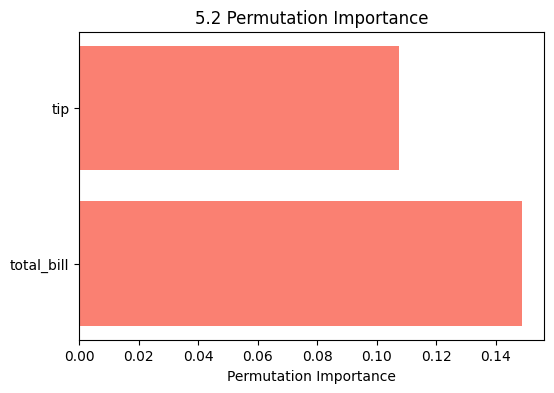

## 5.3. Xüsusiyyət əhəmiyyətini şərh etmə

**Təsviri:**  
- Əhəmiyyət dərəcələri **nisbi göstəricilərdir**.  
- Ən vacib xüsusiyyət 1.0 və ya 100% kimi görünə bilər, amma bu, onun “mütləq” dəyərini göstərmir, sadəcə digərləri ilə müqayisədə əhəmiyyətini göstərir.  
- Bəzi hallarda əhəmiyyət sıralaması **multikollinearlıqdan** təsirlənə bilər (çox əlaqəli xüsusiyyətlər əhəmiyyəti paylaşa bilər).

**Tövsiyə:**  
- Təkcə əhəmiyyət dəyərlərinə baxıb xüsusiyyətləri silmək olmaz.  
- Əlavə analiz (korrelyasiya, domain knowledge) lazımdır.

## 5.4. Feature selection üçün istifadəsi

**Təsviri:**  
- Yüksək əhəmiyyətli xüsusiyyətlər **modelin saxlanacaq** əsas dəyişənləri ola bilər.  
- Aşağı əhəmiyyətli xüsusiyyətlər isə **silinə** və ya **birləşdirilə** bilər ki, model daha sadə olsun.

**Üstünlüklər:**  
- Modelin ölçüsünü azaldır.  
- Hesablama vaxtını qısaldır.  
- Overfitting riskini azaldır.

**Məsələn:**  
- Ən yüksək 10 xüsusiyyəti saxla.  
- Qalanları modeldən çıxar.  
- Cross-validation ilə nəticəni yoxla.


#**6. ⚖️ Üstünlüklər və Çatışmazlıqlar**

Decision Tree (Qərar Ağacı) modelləri çox istifadə olunan, intuitiv və vizual olaraq anlaşılan modellərdən biridir.  
Bununla belə, hər model kimi decision tree-lərin də üstünlükləri və çatışmazlıqları var.


## 6.1. ✅ Üstünlüklər

- **Asan Şərh 📝**  
  Decision Tree modellərinin ən böyük üstünlüyü onların **şəffaflığı və vizual anlaşılmasıdır**.  
  Ağac qurulduqca hər bir düyün (node) bir qərar qaydasını təmsil edir: “əgər xüsusiyyət X bu dəyərdən böyükdürsə, sol budaq; yoxsa sağ budaq”.  
  Bu qaydalar hər kəs üçün asanlıqla oxuna bilər və modelin nəticələri izah edilə bilər.  
  Məsələn, tibbdə bir xəstənin xəstəlik riskini proqnozlaşdırmaq üçün decision tree qurulubsa, həkimlər ağacın hər addımını izləyə bilər və hansı simptomların risk yaratdığını birbaşa görə bilər.

- **Scaling problem deyil📏**  
  Decision Tree-lər xüsusiyyətlərin ölçü vahidindən asılı deyil.  
  Yəni, fərqli vahidlərdəki xüsusiyyətlər (metr, kiloqram, faiz, qiymət və s.) model üçün problem yaratmır.  
  Bu, xüsusilə preprocessing addımlarını sadələşdirir.  
  Məsələn, bir datasetdə `yaş` (il) və `gəlir` (AZN) birlikdə varsa, hər ikisini normalizasiya etməyə ehtiyac yoxdur.

- **Qaydalar dəqiq və aydındır🔍**  
  Ağacın hər bir bölünməsi bir qaydaya əsaslanır.  
  Bu qaydalar sadə və aydındır: “əgər bu şərt doğrudursa, bu budağa keç; əks halda digər budağa”.  
  Bu sayədə, modelin qərar vermə prosesi **açıq və izah edilə bilən** olur.  
  Bu xüsusiyyət modeli biznes və ya hüquqi tətbiqlərdə izah edilə bilən (interpretable) edir.

- **Kateqorik ve ədəi verilənləri birlikdə istifadə edə bilir 📊**  
  Decision Tree-lər həm ədədi (numerical), həm də kateqorik (categorical) xüsusiyyətləri eyni anda emal edə bilir.  
  Məsələn, bir datasetdə `cinsiyyət` (kateqorik) və `yaş` (ədədi) varsa, ağac hər ikisini istifadə edərək bölünmələr qura bilər.  
  Bunun üçün əlavə one-hot encoding və ya scaling kimi preprocess tələb olunmur, bu da prosesi sadələşdirir.

## 6.2. ❌ Çatışmazlıqlar

- **Overfitting-ə meyillilik⚠️**  
  Decision Tree-lər çox dərinə getdikdə **train datasını “əzbərləmə”** meyl göstərir.  
  Yəni, ağac hər bir nümunəyə xüsusi qayda öyrənərək, yeni verilənlərdə zəif performans göstərə bilər.  
  Məsələn, kiçik dataset üzərində tam dərin ağac qurulsa, model səs-küylü məlumatları da öyrənəcək və ümumiləşdirmə qabiliyyəti azalacaq.

- **Kiçik dəyişikliklərə qarşı həssaslıq (high variance) 🌪️**  
  Decision Tree-lər verilənlərdəki kiçik dəyişikliklərə çox həssasdır.  
  Bir neçə yeni nümunə ağacın strukturunu əhəmiyyətli dərəcədə dəyişdirə bilər.  
  Bu, modelin **stabil olmaması** deməkdir.  
  Məsələn, iki oxşar datasetdə fərqli ağac qurulacaq və nəticələr çox fərqli ola bilər.

- **Qarışıq əlaqələri modelləmədə məhduddur🔗**  
  Decision Tree-lər yalnız lokal qaydaları öyrənir və dəyişənlər arasındakı mürəkkəb, qeyri-xətti əlaqələri kifayət qədər yaxşı modelləyə bilmir.  
  Əgər xüsusiyyətlər bir-biri ilə qarşılıqlı əlaqədədirsə, ağac bu əlaqəni tam əks etdirə bilməz.  
  Buna görə çox mürəkkəb və yüksək ölçülü datasetlər üçün **Random Forest** və ya **Gradient Boosting** kimi ensemble modelləri daha uyğun olur.


#**7. 📊 Modeli Dəyərləndirmə**

Decision Tree modellərinin performansını qiymətləndirmək üçün müxtəlif metriklər istifadə olunur.  
Bu metriklər **sinifləndirmə** və **reqressiya** ağacları üçün fərqlidir.

## 7.1. 🏷️ Classification Treelərdə qiymətləndirmə metrikləri

Decision Tree ilə sinifləndirmə (classification) edərkən, modelin **dəqiqliyini və düzgünlük balansını** ölçmək üçün bu metriklərdən istifadə olunur.

- **Accuracy 🎯**  
  Modelin bütün proqnozlarının neçə faizinin doğru olduğunu göstərir.  
  Formula:  
  $$
  \text{Accuracy} = \frac{\text{Doğru proqnozlar}}{\text{Ümumi nümunə sayı}}
  $$  
  ✅ Sadə və intuitivdir, amma **disbalanced datasetlərdə yanıldıcı ola bilər**.  
  Məsələn, 90% “mənfi” nümunədən ibarət datasetdə yalnız “mənfi” proqnoz verən model 90% accuracy göstərər, amma “müsbət” nümunələri düzgün ayıra bilməz.

- **Precision, Recall, F1-score ⚖️**  
  **Precision:** Doğru müsbət proqnozların ümumi müsbət proqnozlardakı nisbəti.  
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$  
  **Recall (Sensitivity):** Doğru müsbət proqnozların bütün əsl müsbət nümunələrə nisbəti.  
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$  
  **F1-score:** Precision və Recall-un harmonik ortalaması.  
  $$
  F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$  
  ⚡ Bu metriklər **disbalanced classlarda** accuracy-dən daha əhəmiyyətlidir.

- **ROC-AUC 📈**  
  ROC (Receiver Operating Characteristic) əyrisi və AUC (Area Under Curve) modelin **fərqli həssaslıq və spesifiklik balanslarını** göstərir.  
  - AUC = 1 → mükəmməl model  
  - AUC = 0.5 → təsadüfi seçim  

  Bu metrik **threshold seçiminə bağlı olmadan** modelin ümumi performansını qiymətləndirir.

## 7.2. 📏 Regression Treelərdə qiymətləndirmə metrikləri

Reqressiya (regression) ağacları üçün isə performansı ölçmək üçün ədədi dəyişənlərə əsaslanan metriklər istifadə olunur.

- **MSE, RMSE 📉**  
  **MSE (Mean Squared Error):** Hər bir proqnoz səhvinin kvadratlarının ortalaması.  
  $$
  MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$  
  **RMSE (Root Mean Squared Error):** MSE-in kvadrat kökü, ölçü vahidini orijinal dəyişənlərlə eyniləşdirir.  
  $$
  RMSE = \sqrt{MSE}
  $$  
  ✅ Daha böyük səhvlərə daha çox cəza verir.

- **MAE (Mean Absolute Error) ✨**  
  Səhvlərin mütləq dəyərlərinin ortalaması:  
  $$
  MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  $$  
  ⚡ Hər bir səhvə eyni dərəcədə önəm verir və outlier-lərə MSE qədər həssas deyil.

- **R² Score 📊**  
  Modelin dəyişənliyin nə qədərini izah etdiyini göstərir:  
  $$
  R^2 = 1 - \frac{\sum_{i} (y_i - \hat{y}_i)^2}{\sum_{i} (y_i - \bar{y})^2}
  $$  
  - 1 → mükəmməl proqnoz  
  - 0 → ortalama ilə eyni proqnoz  
  - <0 → model ortalamadan da pis performans verir  

  Bu metrik reqressiya modellərinin **ümumi uyğunluğunu** göstərmək üçün istifadə olunur.


#**8. 🌳 Decision Treelərdə şərh**

Decision Tree modellərinin güclü tərəfi yalnız proqnoz vermək deyil, həm də **modelin qərar prosesini vizual və izahlı şəkildə anlamaq**dır.

DecisionTreeClassifier(max_depth=3, random_state=42)

## 8.1. 🖼️ Ağacın quruluşunu vizuallaşdırma (graphviz, plot_tree)

- Decision Tree-nin quruluşunu vizual olaraq göstərmək üçün müxtəlif vasitələr mövcuddur.  
- **Vizualizasiya** ilə hər bir düyün (node), budaq (branch) və yarpaq (leaf) açıq şəkildə görünür.  
- Bu üsul modellərin **şəffaflığını artırır** və xüsusilə biznes və elmi tətbiqlərdə izah edilə bilən (interpretable) nəticələr verir.  
- Məsələn, bir tibbi datasetdə xəstəliyin risk faktorlarını görmək üçün ağacın hər bir bölünməsini vizual izləmək mümkündür.  

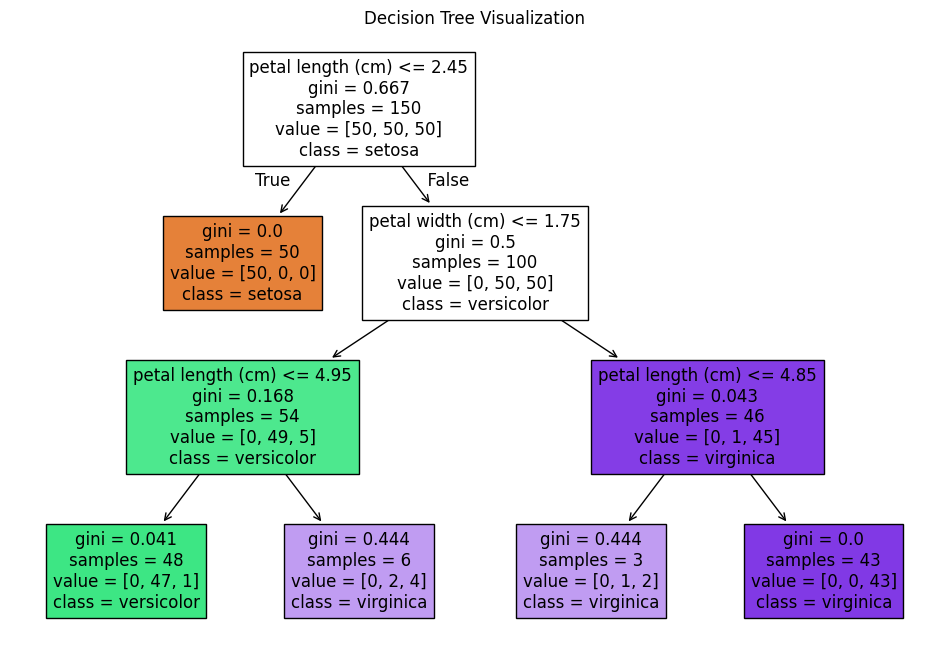

## 8.2. 📜 Qərar vermə qaydaları (decision rules)

- Ağacın hər bir budağında **sadə “if… then…” qaydaları** mövcuddur.  
- Bu qaydaları çıxarmaqla, modelin hansı xüsusiyyətlərdən və hansı dəyərlərdən istifadə etdiyini görə bilərik.  
- Məsələn:  əgər yaş > 50 və qan təzyiqi > 140 → yüksək risk
əks halda → aşağı risk

- Bu, xüsusilə qərarların izahını tələb edən sahələrdə (maliyyə, tibbi) çox faydalıdır.

## 8.3. 📊 Feature importance grafikleri

- Decision Tree modelləri hər bir xüsusiyyətin modelin qərar verməsinə təsirini ölçə bilir.  
- **Feature importance qrafikləri** ilə ən təsirli xüsusiyyətləri vizual şəkildə görə bilərik.  
- Bu qrafiklər modelin hansı dəyişənlərdən daha çox istifadə etdiyini göstərir və xüsusiyyət seçimində (feature selection) rəhbərlik edir.  

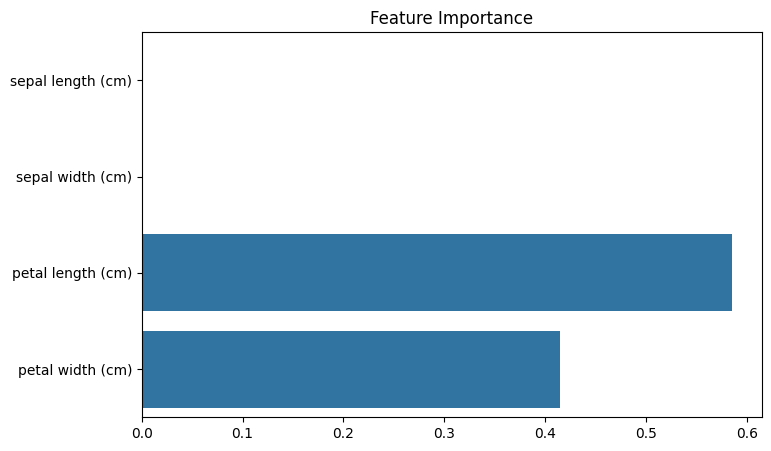

## 8.4. 🛤️ Fərdi qərarların analizi

- Ağacın hər bir yarpağı, fərdi qərar yolunu təmsil edir.  
- Bu yolların analizi ilə hər bir nümunənin necə təsnifləndiyini və hansı xüsusiyyətlərin qərara təsir etdiyini görə bilərik.  
- Məsələn, konkret bir xəstənin “yüksək risk” kateqoriyasına düşməsinin səbəblərini addım-addım izləmək mümkündür.  
- Bu üsul **debugging**, **explainable AI** və istifadəçi izahı üçün vacibdir.


#**9. 🌳 Decision Tree növləri**

Decision Tree modelləri müxtəlif alqoritmlər və varyantlarla qurula bilər.  
Hər bir metodun qərar yaratma strategiyası və istifadə sahəsi fərqlidir.  
Aşağıda ən məşhur ağac tipləri və onların xüsusiyyətləri ətraflı izah olunur.

## 9.1. 📏 ID3 (Iterative Dichotomiser 3)

- ID3 alqoritmi, Ross Quinlan tərəfindən hazırlanmışdır və **sinifləndirmə** üçün istifadə olunur.  
- Əsas prinsip: Hər bir bölünmədə **information gain** maksimum olan xüsusiyyəti seçmək.  
- Impurity ölçüsü kimi **Entropy** istifadə olunur.  
- Üstünlüyü: Sadə və intuitivdir.  
- Məhdudiyyəti: Yalnız kateqorik xüsusiyyətləri birbaşa işləyə bilir; overfitting riski yüksəkdir.

## 9.2. 📊 C4.5 və C5.0

- C4.5, ID3-ün təkmilləşdirilmiş variantıdır.  
- Özəllikləri:  
  - **Continuous (ədədi) xüsusiyyətləri** dəstəkləyir.  
  - Missing value ilə işləyə bilir.  
  - Pruning (budama) dəstəyi var → overfitting-i azaldır.  
- C5.0, C4.5-in daha sürətli və optimallaşdırılmış versiyasıdır.  
- Bu metodlar həm biznes, həm də elmi tətbiqlərdə geniş istifadə olunur.



## 9.3. ⚖️ CART (Classification and Regression Trees)

- CART həm **sinifləndirmə**, həm də **reqressiya** üçün istifadə olunur.  
- Binary (iki budaqlı) ağac qurur.  
- Impurity ölçüləri:  
  - Sinifləndirmə: Gini index  
  - Reqressiya: MSE  
- Üstünlüyü: Sadə, həm klassik həm də reqressiya problemleri üçün uyğundur.  
- CART ağacları həm ön budama, həm də sonradan budama (post-pruning) ilə overfitting-i idarə edə bilir.

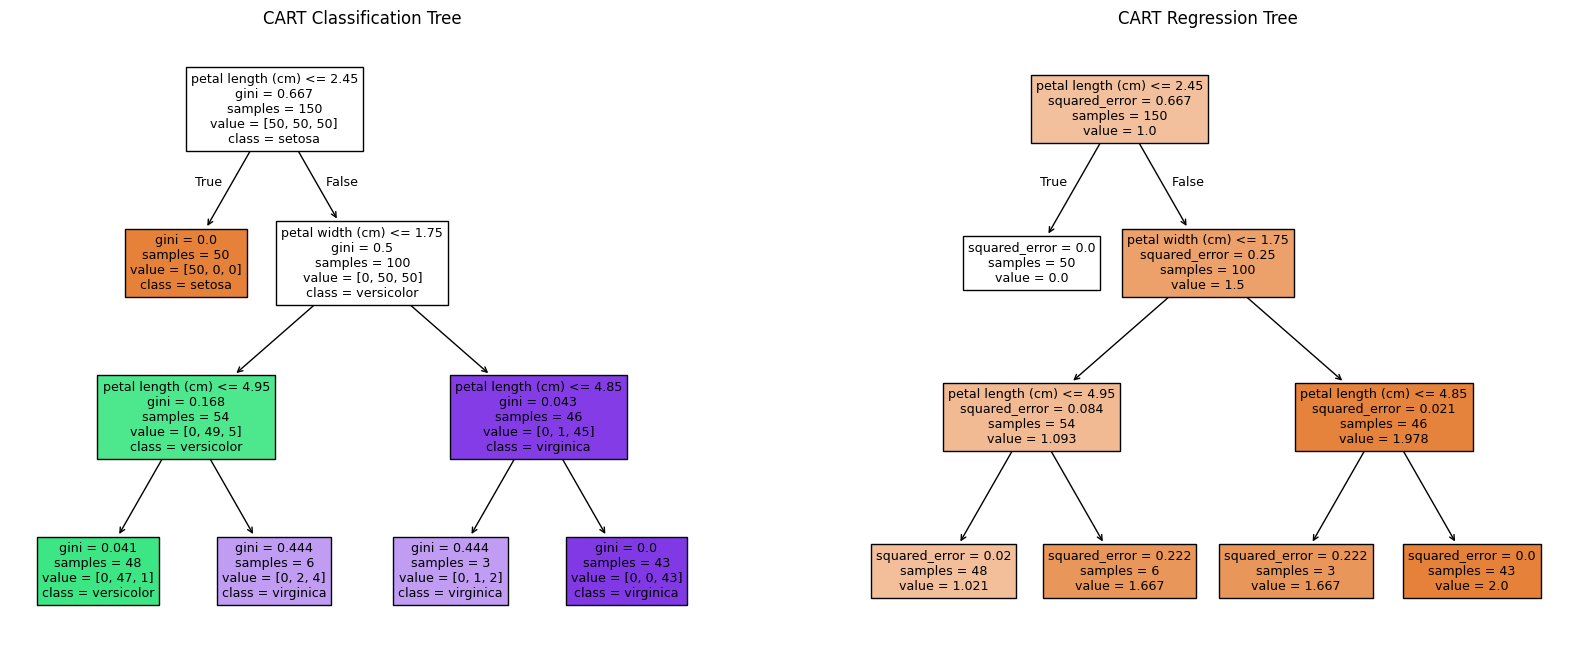

## 9.4. 📐 CHAID (Chi-squared Automatic Interaction Detection)

- CHAID, xüsusiyyətləri bölmək üçün **Chi-square testini** istifadə edir.  
- Əsasən **kategorial xüsusiyyətlərlə** işləyir və interaksiyaları aşkarlayır.  
- Üstünlüyü: Dərin statistik analiz və qruplaşdırma üçün uyğundur.  
- Məhdudiyyəti: Continuous xüsusiyyətlər əvvəlcə discretization tələb edir.

## 9.5. 🔀 MARS (Multivariate Adaptive Regression Splines) – benzer konsept

- MARS, klassik decision tree-dən fərqli olaraq **piecewise (hissə-hissə) xətti funksiyalar** ilə reqressiya qurur.  
- Ağac kimi addım-addım bölgələr yaratmaq yerinə, **multivariate splines** istifadə edərək kompleks qeyri-xətti əlaqələri modelləyir.  
- Üstünlüyü: Daha mürəkkəb əlaqələri daha düzgün təmsil edir.  
- Məhdudiyyəti: Interpretasiya (izah) decision tree qədər sadə deyil.


# 10. 🌳 Decision Treelərin Ensemble metodlarla əlaqəsi

Decision Tree modelləri tək başına güclü olsa da, **ensemble metodlarla birləşdirildikdə** performansı və stabilliyi əhəmiyyətli dərəcədə artırmaq mümkündür.

Ensemble metodlar, çoxlu ağacları bir araya gətirərək **overfitting riskini azaldır**, modelin generalizasiya qabiliyyətini artırır və fərqli datalara qarşı daha stabil olur.

## 10.1. 🌲 Random Forest (bagging ilə)

- Random Forest, bir çox decision tree-dən ibarət **ensemble** modelidir.  
- **Bagging (Bootstrap Aggregating)** metodunu istifadə edir:  
  - Hər bir ağac təlim datasının **təsadüfi alt çoxluq** ilə qurulur.  
  - Nəticələr **ortalama (reqressiya)** və ya **majority vote (sinifləndirmə)** ilə birləşdirilir.  
- Üstünlükləri:  
  - Overfitting riskini azaldır  
  - Hər bir ağacın təsirini balanslayır  
  - Dəyişkənliyi (variance) aşağı salır  
- Dezavantaj: Model ölçüsü böyük ola bilər və interpretasiya tək ağac qədər sadə deyil.

## 10.2. 📈 Gradient Boosting Trees

- Gradient Boosting, **ardıcıl decision tree-lər** quraraq hər yeni ağacın əvvəlki ağacın səhvlərini düzəltməsinə əsaslanır.  
- Burada hər bir ağac **residual-ları öyrənir**, yəni əvvəlki modelin səhv proqnozlarını azaldır.  
- Üstünlükləri:  
  - Daha yüksək dəqiqlik (accuracy)  
  - Çox mürəkkəb və qeyri-xətti əlaqələri öyrənə bilir  
- Çatışmazlıqlar:  
  - Training vaxtı uzun ola bilər  
  - Hyperparameter tuning vacibdir, əks halda overfitting riski var.

## 10.3. ⚡ XGBoost, LightGBM, CatBoost

- Bu metodlar Gradient Boosting-in **optimallaşdırılmış və sürətləndirilmiş** versiyalarıdır:  
  - **XGBoost:** Regularization və parallel computing ilə məşhurdur  
  - **LightGBM:** Həcmli datasetlər üçün sürətli və az yaddaş istifadə edir  
  - **CatBoost:** Kategorik dəyişənləri avtomatik idarə edir və overfitting-i azaldır  
- Üstünlükləri: Yüksək performans, scalable, müxtəlif data tipləri üçün uyğundur  
- Çatışmazlıqlar: Kod və hyperparameter tuning bir qədər mürəkkəbdir.

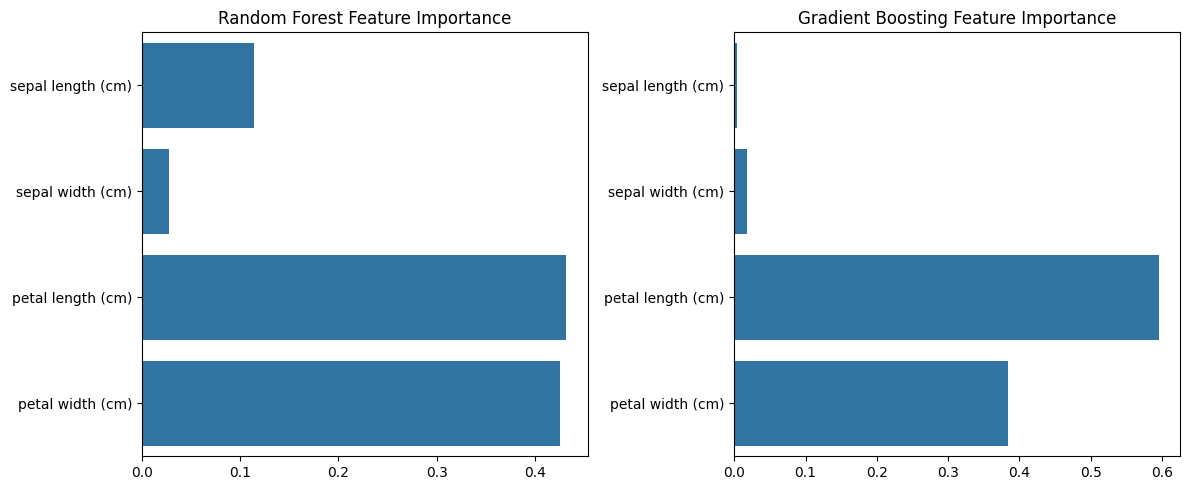

## 10.4. 🛡️ Overfitting-i azaltmada ensemble yanaşmanın rolu

- Tək bir decision tree çox dərin olduqda **overfitting** riski yüksəkdir.  
- Ensemble metodları (Random Forest, Gradient Boosting və digər boosting metodları) bu riski **ağacların birləşdirilməsi ilə** azaldır:  
  - Bagging: variance-i aşağı salır  
  - Boosting: səhvləri ardıcıl düzəldir  
- Nəticədə model **daha stabil**, daha **generalizable** və **real dünya datalarına uyğun** olur.


#**11. 🚀 Qabaqcıl Texnikalar**

Decision Tree-lərlə işləyərkən, sadə modellərdən daha mürəkkəb senarilər üçün bəzi qabaqcıl texnikalar və yanaşmalar lazımdır.

## 11.1. ❓ Missing value handling (CART)

- CART alqoritmi **missing value-ları idarə etmək üçün** xüsusi metodlar təklif edir.  
- İki əsas yanaşma:  
  - **Surrogate splits:** Əsas xüsusiyyətin məlumatı yoxdursa, ən oxşar digər xüsusiyyətə baxaraq bölünmə edir.  
  - **İmmputation (doldurma):** Əksik dəyərləri ortalama, median və ya ən çox rast gəlinən dəyərlə əvəz edir.  
- Bu yanaşmalar modelin məlumat itkisinə görə performansının aşağı düşməsinin qarşısını alır.

## 11.2. ⚖️ Class imbalance problemlərində çəkiləndirmə (class_weight)

- Dengesiz siniflər (məsələn, 95% “mənfi” və 5% “müsbət”) decision tree üçün problem yarada bilər.  
- **class_weight** parametrindən istifadə edərək hər sinifə fərqli çəkilər verilir:  
  - Az təmsil olunan sinifə yüksək çəki  
  - Çox təmsil olunan sinifə aşağı çəki  
- Bu yanaşma modelin nadir sinifləri **daha yaxşı öyrənməsinə** kömək edir.

## 11.3. 🔀 Multi-output decision trees

- Bəzi problemlərdə bir neçə hədəf dəyişən (target variable) eyni anda proqnozlaşdırılmalıdır.  
- **Multi-output trees** hər bir hədəf üçün eyni ağacı paylaşır, lakin ayrı bölünmələr və qiymətləndirmə aparır.  
- Məsələn, tibbi datasetdə eyni xəstəyə həm qan təzyiqi, həm də şəkər səviyyəsi proqnozlaşdırıla bilər.

## 11.4. 🛡️ Model stabilizasiyası ve seed təsiri

- Decision Tree-lər **randomness**-dən təsirlənir (xüsusilə Random Forest və bagging).  
- Eyni dataset və parametrlərlə bir neçə dəfə model qurulduqda nəticələr bir qədər fərqlənə bilər.  
- **random_state / seed** parametri ilə təkrarlanabilirlik təmin edilir və modelin stabilliyi artırılır.  
- Bu, xüsusilə **eksperimental müqayisələr və hyperparameter tuning** zamanı vacibdir.

#**12. 🛠️ Praktikada istifadə**

Decision Tree modellərini real dünyada effektiv və performanslı istifadə etmək üçün bəzi praktik texnikalar və strategiyalar mövcuddur.  
Bu bölmədə hyperparameter tuning, model sadələşdirmə, pipeline inteqrasiyası və istehsal mühitində model yenilənməsi izah olunur.

## 12.1. 🎯 Hyperparameter tuning (GridSearchCV, RandomizedSearchCV)

- Decision Tree-lərin performansı çox vaxt **hyperparameter-lərə** bağlıdır:  
  - `max_depth`, `min_samples_split`, `max_features` və s.  
- **GridSearchCV:** Bütün hyperparameter kombinasiyalarını yoxlayır və ən yaxşısını seçir.  
- **RandomizedSearchCV:** Təsadüfi seçilmiş kombinasiyalar üzərində performansı yoxlayır, daha sürətli nəticə verir.  
- Bu yanaşmalar modelin həm **dəqiqliyini artırır**, həm də **overfitting riskini azaldır**.

## 12.2. ⚖️ Modeli sadələşdirmə

- Çox mürəkkəb ağaclar overfitting yarada bilər.  
- **Sadələşdirmə metodları:**  
  - `max_depth` ilə ağacı məhdudlaşdırmaq  
  - `min_samples_leaf` ilə yarpaqdakı minimal nümunə sayını təyin etmək  
  - Post-pruning (cost complexity pruning) tətbiq etmək  
- Məqsəd: Ağacın **sadə, interpretasiya edilə bilən və stabil** qalmasını təmin etmək.

## 12.3. 🔗 Pipeline ilə inteqrasiya

- Modeli preprocessing addımları ilə birləşdirərək **end-to-end pipeline** yaratmaq tövsiyə olunur:  
  - Missing value handling  
  - Encoding (kateqorik dəyişənlər üçün)  
  - Feature scaling (əgər tələb olunursa)  
  - Decision Tree model qurulması  
- Pipeline həm **təkrarlanabilirliyi artırır**, həm də **kodun idarə olunmasını asanlaşdırır**.

## 12.4. 🏭 Model yeniləmə strategiyaları

- İstehsal mühitində decision tree modelləri zamanla performansını itirə bilər (concept drift).  
- Tövsiyə olunan strategiyalar:  
  - Müntəzəm olaraq **train datasını yeniləmək**  
  - Yeni məlumatlarla **retrain və ya incremental update** aparmaq  
  - Modelin performansını **monitoring** ilə izləmək  
- Bu yanaşma modelin **davamlı olaraq doğru və etibarlı qalmasını təmin edir**.